Este notebook genera que pdb's se van a descargar para la prueba, teniendo un muestreo aleatorio con cluster de tamanio 2 con similitud del 95% y 30%.

In [2]:
import pandas as pd
import numpy as np
np.random.seed(18)

## libreria para descargar pdbs para su posterior evaluacion

In [3]:
!pip install pypdb

In [4]:
import pypdb
import os

In [5]:
# prueba
pdb = pypdb.get_pdb_file('1xxa')

# text_file = open("1xxa_A.pdb", "w")

for i in pdb.split("\n"):
    if i.split()[0] == 'ATOM':
        if i[21] == 'B':
#             print(i)
#             text_file.write("%s\n"%i)

    if i.split()[0] == 'END':
        break
        
# text_file.close()

IndentationError: expected an indented block (<ipython-input-5-3e897860a467>, line 12)

# CLuster 95

In [19]:
df = pd.read_csv('../../../Descargas/bc-95.out', sep='\n', names=['cluster'])

np.random.seed(8) # mismo conjunto siempre

lista = []
for i in df.cluster:
    lista.append(len(i.split()))

df['cluster_size'] = lista

df = df[df.cluster_size == 2].sample(55)


df['proteina_a'] = df.cluster.str.split().str[0]
df['prot_a'] = df.cluster.str.split().str[0].str.split("_").str[0]
df['chain_a'] = df.cluster.str.split().str[0].str.split("_").str[1]

df['proteina_b'] = df.cluster.str.split().str[1]
df['prot_b'] = df.cluster.str.split().str[1].str.split("_").str[0]
df['chain_b'] = df.cluster.str.split().str[1].str.split("_").str[1]

print(df.shape)

df.head()

(55, 8)


,cluster,cluster_size,proteina_a,prot_a,chain_a,proteina_b,prot_b,chain_b
33719,1Y0J_A 1GNF_A,2,1Y0J_A,1Y0J,A,1GNF_A,1GNF,A
29326,2BYC_A 2BYC_B,2,2BYC_A,2BYC,A,2BYC_B,2BYC,B
34414,3M5U_A 3M5U_B,2,3M5U_A,3M5U,A,3M5U_B,3M5U,B
41126,3HVM_A 2CMU_A,2,3HVM_A,3HVM,A,2CMU_A,2CMU,A
33512,4ETV_A 4ETV_B,2,4ETV_A,4ETV,A,4ETV_B,4ETV,B


In [344]:
# funcion para descargar el pdb y limpiarlo por cadena
def write_pdb(filename, chain,path=""):
    
    pdb_data = pypdb.get_pdb_file(filename)
    pdb_file = open(path+filename+"_"+chain+".pdb", "w")
    
    for i in pdb_data.split("\n"):
        if i.split()[0] == 'ATOM':
            if i[21] == chain:
                if i.split()[5][-1] == 'P':
                    continue
                else:
                    pdb_file.write("%s\n"%i)
        if i.split()[0] == 'END':
            break
            
    pdb_file.close()

In [345]:
for i,j in enumerate(df.columns):
    print(i,j)

0 proteinaA_proteinaB
1 grupo
2 cliques_ganadores
3 num_parejas
4 num_residuos_total
5 SO
6 RMSD
7 parejas


In [346]:
import urllib

In [74]:
for j,i in enumerate(df.values):
#     print(i)
    if i[0] == '5V7Q_0_5V93_0':
        print('no tiene pdb')
        print(i)
        continue
    else:
        path_dir = i[2]+'_'+i[5]
        f1 = i[3]
        f2 = i[6]
        c1 = i[4]
        c2 = i[7]
        os.mkdir(path_dir)
        print(j, path_dir,f1,f2)
        try: 
            write_pdb(filename=f1,chain=c1, path=path_dir+'/')
            write_pdb(filename=f2,chain=c2, path=path_dir+'/')

        except urllib.error.HTTPError as err:
            if err == 404:
                print(j, path_dir)
                continue

0 1Y0J_A_1GNF_A 1Y0J 1GNF
1 2BYC_A_2BYC_B 2BYC 2BYC
2 3M5U_A_3M5U_B 3M5U 3M5U
3 3HVM_A_2CMU_A 3HVM 2CMU
4 4ETV_A_4ETV_B 4ETV 4ETV
5 5IR0_A_5IR0_B 5IR0 5IR0
6 4ZI9_A_4ZI9_B 4ZI9 4ZI9
7 1F45_B_3HMX_B 1F45 3HMX
8 4S2S_H_4S2S_A 4S2S 4S2S
9 3J8B_H_3J8C_H 3J8B 3J8C
10 4BG5_A_4BG5_B 4BG5 4BG5
11 5N4K_A_5N4K_B 5N4K 5N4K
12 5DLM_H_5DLM_I 5DLM 5DLM
13 1CJL_A_1CS8_A 1CJL 1CS8
14 4Q82_A_4Q82_B 4Q82 4Q82
15 2Q7V_A_2Q7V_B 2Q7V 2Q7V
16 1XGY_L_1XGY_M 1XGY 1XGY
17 1ZTD_A_1ZTD_B 1ZTD 1ZTD
18 4FD9_A_4FD9_B 4FD9 4FD9
19 2IJ9_A_2IJ9_B 2IJ9 2IJ9
20 5W1S_M_5W1S_N 5W1S 5W1S
21 3SON_A_3SON_B 3SON 3SON
22 3M8J_A_3M8J_B 3M8J 3M8J
23 3H1Q_A_3H1Q_B 3H1Q 3H1Q
24 1W7P_A_1U5T_A 1W7P 1U5T
25 3RGH_A_3RGH_B 3RGH 3RGH
26 2LQR_A_2DM2_A 2LQR 2DM2
27 2C2N_A_2C2N_B 2C2N 2C2N
28 1WUF_A_1WUF_B 1WUF 1WUF
29 1EDZ_A_1EE9_A 1EDZ 1EE9
30 2G0W_A_2G0W_B 2G0W 2G0W
31 2PZ1_A_2DX1_A 2PZ1 2DX1
32 3LKD_A_3LKD_B 3LKD 3LKD
33 6G72_e_6G2J_e 6G72 6G2J
34 5V7Q_0_5V93_0 5V7Q 5V93
35 4EM8_A_4EM8_B 4EM8 4EM8
36 6BR8_A_6BR8_B 6BR8 6BR8
37 3I57_A_3

# Cluster 30

In [350]:
df = pd.read_csv('../../../Descargas/bc-30.out', sep='\n', names=['cluster'])

np.random.seed(8) # mismo conjunto siempre

lista = []
for i in df.cluster:
    lista.append(len(i.split()))

df['cluster_size'] = lista

df = df[df.cluster_size == 2].sample(50)

df['proteina_a'] = df.cluster.str.split().str[0]
df['prot_a'] = df.cluster.str.split().str[0].str.split("_").str[0]
df['chain_a'] = df.cluster.str.split().str[0].str.split("_").str[1]

df['proteina_b'] = df.cluster.str.split().str[1]
df['prot_b'] = df.cluster.str.split().str[1].str.split("_").str[0]
df['chain_b'] = df.cluster.str.split().str[1].str.split("_").str[1]

print(df.shape)

df.head()

(50, 8)


,cluster,cluster_size,proteina_a,prot_a,chain_a,proteina_b,prot_b,chain_b
18789,2H9E_C 1COU_A,2,2H9E_C,2H9E,C,1COU_A,1COU,A
20039,3SWH_A 3SWH_B,2,3SWH_A,3SWH,A,3SWH_B,3SWH,B
16125,2PRX_A 2PRX_B,2,2PRX_A,2PRX,A,2PRX_B,2PRX,B
20676,4AFI_A 4AFI_B,2,4AFI_A,4AFI,A,4AFI_B,4AFI,B
18032,3SHP_A 3SHP_B,2,3SHP_A,3SHP,A,3SHP_B,3SHP,B


In [352]:
for j,i in enumerate(df.values):
#     print(i)
    if i[0] == '5V7Q_0_5V93_0':
        print('no tiene pdb')
        print(i)
        continue
    else:
        path_dir = i[2]+'_'+i[5]
        f1 = i[3]
        f2 = i[6]
        c1 = i[4]
        c2 = i[7]
        os.mkdir(path_dir)
        print(j, path_dir,f1,f2)
        try: 
            write_pdb(filename=f1,chain=c1, path=path_dir+'/')
            write_pdb(filename=f2,chain=c2, path=path_dir+'/')

        except urllib.error.HTTPError as err:
            if err == 404:
                print(j, path_dir)
                continue

0 2H9E_C_1COU_A 2H9E 1COU
1 3SWH_A_3SWH_B 3SWH 3SWH
2 2PRX_A_2PRX_B 2PRX 2PRX
3 4AFI_A_4AFI_B 4AFI 4AFI
4 3SHP_A_3SHP_B 3SHP 3SHP
5 3ONL_C_3ONJ_A 3ONL 3ONJ
6 3DOM_A_3DOM_C 3DOM 3DOM
7 3E18_A_3E18_B 3E18 3E18
8 4BKX_A_5ICN_A 4BKX 5ICN
9 2H1T_A_2H1T_B 2H1T 2H1T
10 4A69_C_4A69_D 4A69 4A69
11 1P91_A_1P91_B 1P91 1P91
12 2EE0_A_2YST_A 2EE0 2YST
13 3T43_A_3T43_B 3T43 3T43
14 5T2A_N_4V8M_BP 5T2A 4V8M
15 2XXZ_A_2XXZ_B 2XXZ 2XXZ
16 2BGH_A_2BGH_B 2BGH 2BGH
17 2B5O_A_2B5O_B 2B5O 2B5O
18 4PED_A_5I35_A 4PED 5I35
19 4CCG_X_4CCG_Y 4CCG 4CCG
20 2JW2_A_2H80_A 2JW2 2H80
21 4F5C_E_4F5C_F 4F5C 4F5C
22 2Q0O_A_2Q0O_B 2Q0O 2Q0O
23 4QOY_E_4QOY_F 4QOY 4QOY
24 6B57_A_6B57_B 6B57 6B57
25 4MZZ_A_4MZZ_B 4MZZ 4MZZ
26 3FZY_A_3FZY_B 3FZY 3FZY
27 1FLL_X_1FLL_Y 1FLL 1FLL
28 5NOC_A_5NOC_B 5NOC 5NOC
29 4LXR_A_4LXS_A 4LXR 4LXS
30 1FFT_B_1FFT_G 1FFT 1FFT
31 1MIJ_A_1XPX_A 1MIJ 1XPX
32 5E27_A_5E27_B 5E27 5E27
33 2KWI_B_2KWH_A 2KWI 2KWH
34 2A7L_A_2A7L_B 2A7L 2A7L
35 1L1O_C_1L1O_F 1L1O 1L1O
36 3DAL_A_3DAL_B 3DAL 3DAL
37 5HKP_C_

In [353]:
df

,cluster,cluster_size,proteina_a,prot_a,chain_a,proteina_b,prot_b,chain_b
18789,2H9E_C 1COU_A,2,2H9E_C,2H9E,C,1COU_A,1COU,A
20039,3SWH_A 3SWH_B,2,3SWH_A,3SWH,A,3SWH_B,3SWH,B
16125,2PRX_A 2PRX_B,2,2PRX_A,2PRX,A,2PRX_B,2PRX,B
20676,4AFI_A 4AFI_B,2,4AFI_A,4AFI,A,4AFI_B,4AFI,B
18032,3SHP_A 3SHP_B,2,3SHP_A,3SHP,A,3SHP_B,3SHP,B
18342,3ONL_C 3ONJ_A,2,3ONL_C,3ONL,C,3ONJ_A,3ONJ,A
18649,3DOM_A 3DOM_C,2,3DOM_A,3DOM,A,3DOM_C,3DOM,C
18670,3E18_A 3E18_B,2,3E18_A,3E18,A,3E18_B,3E18,B
18773,4BKX_A 5ICN_A,2,4BKX_A,4BKX,A,5ICN_A,5ICN,A
19153,2H1T_A 2H1T_B,2,2H1T_A,2H1T,A,2H1T_B,2H1T,B


# CLuster 50

In [6]:
df = pd.read_csv('../../../Descargas/bc-50.out', sep='\n', names=['cluster'])

np.random.seed(8) # mismo conjunto siempre

lista = []
for i in df.cluster:
    lista.append(len(i.split()))

df['cluster_size'] = lista

df = df[df.cluster_size == 2].sample(55)


df['proteina_a'] = df.cluster.str.split().str[0]
df['prot_a'] = df.cluster.str.split().str[0].str.split("_").str[0]
df['chain_a'] = df.cluster.str.split().str[0].str.split("_").str[1]

df['proteina_b'] = df.cluster.str.split().str[1]
df['prot_b'] = df.cluster.str.split().str[1].str.split("_").str[0]
df['chain_b'] = df.cluster.str.split().str[1].str.split("_").str[1]

print(df.shape)

df.head()

(55, 8)


,cluster,cluster_size,proteina_a,prot_a,chain_a,proteina_b,prot_b,chain_b
26877,4AKA_A 4EL6_A,2,4AKA_A,4AKA,A,4EL6_A,4EL6,A
30257,5YZ0_A 5YZ0_B,2,5YZ0_A,5YZ0,A,5YZ0_B,5YZ0,B
23306,6MZL_P 6MZD_P,2,6MZL_P,6MZL,P,6MZD_P,6MZD,P
25347,2G1E_A 2K22_A,2,2G1E_A,2G1E,A,2K22_A,2K22,A
24263,4BY6_C 4BY6_F,2,4BY6_C,4BY6,C,4BY6_F,4BY6,F


In [7]:
# funcion para descargar el pdb y limpiarlo por cadena
def write_pdb(filename, chain,path=""):
    
    pdb_data = pypdb.get_pdb_file(filename)
    pdb_file = open(path+filename+"_"+chain+".pdb", "w")
    
    for i in pdb_data.split("\n"):
        if i.split()[0] == 'ATOM':
            if i[21] == chain:
                if i.split()[5][-1] == 'P':
                    continue
                else:
                    pdb_file.write("%s\n"%i)
        if i.split()[0] == 'END':
            break
            
    pdb_file.close()

In [8]:
for i,j in enumerate(df.columns):
    print(i,j)

0 cluster
1 cluster_size
2 proteina_a
3 prot_a
4 chain_a
5 proteina_b
6 prot_b
7 chain_b


In [9]:
import urllib

In [10]:
for j,i in enumerate(df.values):
#     print(i)
    if i[0] == '5V7Q_0_5V93_0':
        print('no tiene pdb')
        print(i)
        continue
    else:
        path_dir = i[2]+'_'+i[5]
        f1 = i[3]
        f2 = i[6]
        c1 = i[4]
        c2 = i[7]
        os.mkdir(path_dir)
        print(j, path_dir,f1,f2)
        try: 
            write_pdb(filename=f1,chain=c1, path=path_dir+'/')
            write_pdb(filename=f2,chain=c2, path=path_dir+'/')

        except urllib.error.HTTPError as err:
            if err == 404:
                print(j, path_dir)
                continue

0 4AKA_A_4EL6_A 4AKA 4EL6
1 5YZ0_A_5YZ0_B 5YZ0 5YZ0
2 6MZL_P_6MZD_P 6MZL 6MZD
3 2G1E_A_2K22_A 2G1E 2K22
4 4BY6_C_4BY6_F 4BY6 4BY6
5 3VV4_A_3VV4_B 3VV4 3VV4
6 4M7V_A_4M7U_A 4M7V 4M7U
7 5CA5_A_5CA5_B 5CA5 5CA5
8 5LDE_A_5LDE_B 5LDE 5LDE
9 6BK4_A_6BK4_B 6BK4 6BK4
10 2DK3_A_3DKM_A 2DK3 3DKM
11 3KF8_B_3KF8_D 3KF8 3KF8
12 3D34_A_3D34_B 3D34 3D34
13 1XX6_A_1XX6_B 1XX6 1XX6
14 3C4M_C_3C4M_D 3C4M 3C4M
15 5UMD_X_3J79_X 5UMD 3J79
16 5YHU_A_5YHU_B 5YHU 5YHU
17 3MKY_B_3MKY_P 3MKY 3MKY
18 3LY5_A_3LY5_B 3LY5 3LY5
19 5EIP_A_5EIP_B 5EIP 5EIP
20 6DFD_A_6DFD_B 6DFD 6DFD
21 3EO6_A_3EO6_B 3EO6 3EO6
22 1WG5_A_6DG1_A 1WG5 6DG1
23 1U08_A_1U08_B 1U08 1U08
24 5B52_A_5B52_B 5B52 5B52
25 2RV6_A_2RSJ_A 2RV6 2RSJ
26 5O2Q_A_5O2P_A 5O2Q 5O2P
27 1NW1_A_1NW1_B 1NW1 1NW1
28 3I4S_A_3I4S_B 3I4S 3I4S
29 6HIX_BA_6HIV_BA 6HIX 6HIV
30 2KIM_A_2KIF_A 2KIM 2KIF
31 3C5W_P_3C5V_A 3C5W 3C5V
32 4AFX_B_4AJU_B 4AFX 4AJU
33 3IFR_A_3IFR_B 3IFR 3IFR
34 3NWJ_A_3NWJ_B 3NWJ 3NWJ
35 1HLO_A_1HLO_B 1HLO 1HLO
36 4QMF_D_4QMF_B 4QMF 4QMF
37 2J4M_A

# CLuster 70

In [13]:
df = pd.read_csv('../../../Descargas/bc-70.out', sep='\n', names=['cluster'])

np.random.seed(8) # mismo conjunto siempre

lista = []
for i in df.cluster:
    lista.append(len(i.split()))

df['cluster_size'] = lista

df = df[df.cluster_size == 2].sample(55)


df['proteina_a'] = df.cluster.str.split().str[0]
df['prot_a'] = df.cluster.str.split().str[0].str.split("_").str[0]
df['chain_a'] = df.cluster.str.split().str[0].str.split("_").str[1]

df['proteina_b'] = df.cluster.str.split().str[1]
df['prot_b'] = df.cluster.str.split().str[1].str.split("_").str[0]
df['chain_b'] = df.cluster.str.split().str[1].str.split("_").str[1]

print(df.shape)

df.head()

(55, 8)


,cluster,cluster_size,proteina_a,prot_a,chain_a,proteina_b,prot_b,chain_b
28483,1KL7_A 1KL7_B,2,1KL7_A,1KL7,A,1KL7_B,1KL7,B
29907,1BHD_A 1BHD_B,2,1BHD_A,1BHD,A,1BHD_B,1BHD,B
28629,4GO6_A 4GO6_C,2,4GO6_A,4GO6,A,4GO6_C,4GO6,C
29340,4PH6_A 4PH6_B,2,4PH6_A,4PH6,A,4PH6_B,4PH6,B
24954,5BUM_A 5BUM_B,2,5BUM_A,5BUM,A,5BUM_B,5BUM,B


In [14]:
# funcion para descargar el pdb y limpiarlo por cadena
def write_pdb(filename, chain,path=""):
    
    pdb_data = pypdb.get_pdb_file(filename)
    pdb_file = open(path+filename+"_"+chain+".pdb", "w")
    
    for i in pdb_data.split("\n"):
        if i.split()[0] == 'ATOM':
            if i[21] == chain:
                if i.split()[5][-1] == 'P':
                    continue
                else:
                    pdb_file.write("%s\n"%i)
        if i.split()[0] == 'END':
            break
            
    pdb_file.close()

In [15]:
for i,j in enumerate(df.columns):
    print(i,j)

0 cluster
1 cluster_size
2 proteina_a
3 prot_a
4 chain_a
5 proteina_b
6 prot_b
7 chain_b


In [16]:
import urllib

In [17]:
for j,i in enumerate(df.values):
#     print(i)
    if i[0] == '5V7Q_0_5V93_0':
        print('no tiene pdb')
        print(i)
        continue
    else:
        path_dir = i[2]+'_'+i[5]
        f1 = i[3]
        f2 = i[6]
        c1 = i[4]
        c2 = i[7]
        os.mkdir(path_dir)
        print(j, path_dir,f1,f2)
        try: 
            write_pdb(filename=f1,chain=c1, path=path_dir+'/')
            write_pdb(filename=f2,chain=c2, path=path_dir+'/')

        except urllib.error.HTTPError as err:
            if err == 404:
                print(j, path_dir)
                continue

0 1KL7_A_1KL7_B 1KL7 1KL7


KeyboardInterrupt: 

---------------

# Script para aplicar click a todas las carpetas

In [11]:
import glob
import subprocess as sp

In [12]:
lista_dir = [x[0] for x in os.walk(os.getcwd()) if len(x[0].split("/")[-1]) == 13 
             and x[0].split("/")[-2] != 'cluster_95'
            ]
lista_dir

['/home/serch/pdbmani/Serch/Experimentos/2G1E_A_2K22_A',
 '/home/serch/pdbmani/Serch/Experimentos/2KIM_A_2KIF_A',
 '/home/serch/pdbmani/Serch/Experimentos/3C4M_C_3C4M_D',
 '/home/serch/pdbmani/Serch/Experimentos/6DFD_A_6DFD_B',
 '/home/serch/pdbmani/Serch/Experimentos/2O7R_A_2O7V_A',
 '/home/serch/pdbmani/Serch/Experimentos/6BK4_A_6BK4_B',
 '/home/serch/pdbmani/Serch/Experimentos/3FBK_A_3FBK_B',
 '/home/serch/pdbmani/Serch/Experimentos/3IFR_A_3IFR_B',
 '/home/serch/pdbmani/Serch/Experimentos/3I4S_A_3I4S_B',
 '/home/serch/pdbmani/Serch/Experimentos/3KF8_B_3KF8_D',
 '/home/serch/pdbmani/Serch/Experimentos/4WWV_A_4WWV_B',
 '/home/serch/pdbmani/Serch/Experimentos/5B52_A_5B52_B',
 '/home/serch/pdbmani/Serch/Experimentos/2RV6_A_2RSJ_A',
 '/home/serch/pdbmani/Serch/Experimentos/5LDE_A_5LDE_B',
 '/home/serch/pdbmani/Serch/Experimentos/3EO6_A_3EO6_B',
 '/home/serch/pdbmani/Serch/Experimentos/3GWY_A_3GWY_B',
 '/home/serch/pdbmani/Serch/Experimentos/3VV4_A_3VV4_B',
 '/home/serch/pdbmani/Serch/Exp

In [357]:
for i in lista_dir:
    try:
        pdb1 = glob.glob(i+'/*.pdb')[0]
        pdb2 = glob.glob(i+'/*.pdb')[1]
        print(pdb1.split("/")[-1],pdb2.split("/")[-1])
        sp.run(['/home/serch/Escritorio/Click_X86_64/click', pdb1, pdb2])
    except IndexError:
        print('====no tiene pdb completos======')
        print(i)
        continue

3SHP_A.pdb 3SHP_B.pdb
3T43_B.pdb 3T43_A.pdb
4A69_D.pdb 4A69_C.pdb
4CCG_X.pdb 4CCG_Y.pdb
2BGH_B.pdb 2BGH_A.pdb
2H1T_A.pdb 2H1T_B.pdb
5ZE4_A.pdb 5YM0_A.pdb
4AFI_B.pdb 4AFI_A.pdb
5VG9_A.pdb 5V7P_A.pdb
3KZT_B.pdb 3KZT_A.pdb
6B57_A.pdb 6B57_B.pdb
5CWS_F.pdb 5CWS_L.pdb
4QOY_F.pdb 4QOY_E.pdb
3QQ6_A.pdb 3QQ6_B.pdb
2B5O_A.pdb 2B5O_B.pdb
5HKP_C.pdb 5HKP_D.pdb
2PRX_B.pdb 2PRX_A.pdb
1FFT_B.pdb 1FFT_G.pdb
3P1X_A.pdb 3P1X_B.pdb
1P91_A.pdb 1P91_B.pdb
4PED_A.pdb 5I35_A.pdb
3J08_A.pdb 3J08_B.pdb
2H80_A.pdb 2JW2_A.pdb
5NOC_B.pdb 5NOC_A.pdb
3HR6_A.pdb 3HTL_X.pdb
2EE0_A.pdb 2YST_A.pdb
2Q0O_B.pdb 2Q0O_A.pdb
3E4V_A.pdb 3E4V_B.pdb
4MZZ_A.pdb 4MZZ_B.pdb
3AUW_B.pdb 3AUW_D.pdb
2KWI_B.pdb 2KWH_A.pdb
1L1O_F.pdb 1L1O_C.pdb
3SWH_B.pdb 3SWH_A.pdb
4LXR_A.pdb 4LXS_A.pdb
1WT8_A.pdb 1RJI_A.pdb
2XXZ_A.pdb 2XXZ_B.pdb
1MIJ_A.pdb 1XPX_A.pdb
5UEB_A.pdb 5UEB_B.pdb
2H9E_C.pdb 1COU_A.pdb
3FZY_A.pdb 3FZY_B.pdb
4F5C_E.pdb 4F5C_F.pdb
3ONL_C.pdb 3ONJ_A.pdb
3DOM_A.pdb 3DOM_C.pdb
2A7L_A.pdb 2A7L_B.pdb
5E27_A.pdb 5E27_B.pdb
3DAL_B.pdb

-------------------------------


# Script para aplicar get_results_click

In [358]:
for i in lista_dir:
    try:
        file = i
        print(file)
        sp.run(['python', '/home/serch/pdbmani/Serch/get_results_click.py', file])
    except IndexError:
        print('====no tiene resultados======')
        print(i)
        continue

/home/serch/pdbmani/Serch/Experimentos/3SHP_A_3SHP_B
/home/serch/pdbmani/Serch/Experimentos/3T43_A_3T43_B
/home/serch/pdbmani/Serch/Experimentos/4A69_C_4A69_D
/home/serch/pdbmani/Serch/Experimentos/4CCG_X_4CCG_Y
/home/serch/pdbmani/Serch/Experimentos/2BGH_A_2BGH_B
/home/serch/pdbmani/Serch/Experimentos/2H1T_A_2H1T_B
/home/serch/pdbmani/Serch/Experimentos/5ZE4_A_5YM0_A
/home/serch/pdbmani/Serch/Experimentos/4AFI_A_4AFI_B
/home/serch/pdbmani/Serch/Experimentos/5VG9_A_5V7P_A
/home/serch/pdbmani/Serch/Experimentos/3KZT_A_3KZT_B
/home/serch/pdbmani/Serch/Experimentos/6B57_A_6B57_B
/home/serch/pdbmani/Serch/Experimentos/5CWS_F_5CWS_L
/home/serch/pdbmani/Serch/Experimentos/4QOY_E_4QOY_F
/home/serch/pdbmani/Serch/Experimentos/3QQ6_A_3QQ6_B
/home/serch/pdbmani/Serch/Experimentos/2B5O_A_2B5O_B
/home/serch/pdbmani/Serch/Experimentos/5HKP_C_5HKP_D
/home/serch/pdbmani/Serch/Experimentos/2PRX_A_2PRX_B
/home/serch/pdbmani/Serch/Experimentos/1FFT_B_1FFT_G
/home/serch/pdbmani/Serch/Experimentos/3P1X_A_

# Por si no salieron bien los csv's

In [97]:
# borrado de csv's!!!
for i in lista_dir:
    try:
        file = glob.glob(i+'/*.csv')[0]
        print(file)
        sp.run(['rm', file])
    except IndexError:
        print('====no tiene resultados======')
        print(i)
        continue

/home/serch/pdbmani/Serch/Experimentos/4S2S_H_4S2S_A/4S2S_H-4S2_click.csv
/home/serch/pdbmani/Serch/Experimentos/4PUC_A_4PUC_B/4PUC_A-4PU_click.csv
/home/serch/pdbmani/Serch/Experimentos/1WUF_A_1WUF_B/1WUF_A-1WU_click.csv
/home/serch/pdbmani/Serch/Experimentos/2LQR_A_2DM2_A/2LQR_A-2DM_click.csv
/home/serch/pdbmani/Serch/Experimentos/4ETV_A_4ETV_B/4ETV_A-4ET_click.csv
/home/serch/pdbmani/Serch/Experimentos/5HH0_A_5HH1_A/5HH1_A-5HH_click.csv
/home/serch/pdbmani/Serch/Experimentos/1F45_B_3HMX_B/3HMX_B-1F4_click.csv
/home/serch/pdbmani/Serch/Experimentos/1EDZ_A_1EE9_A/1EDZ_A-1EE_click.csv
/home/serch/pdbmani/Serch/Experimentos/4ARD_A_4ARD_B/4ARD_B-4AR_click.csv
/home/serch/pdbmani/Serch/Experimentos/3M8J_A_3M8J_B/3M8J_A-3M8_click.csv
/home/serch/pdbmani/Serch/Experimentos/5IR0_A_5IR0_B/5IR0_A-5IR_click.csv
/home/serch/pdbmani/Serch/Experimentos/2PZ1_A_2DX1_A/2DX1_A-2PZ_click.csv
/home/serch/pdbmani/Serch/Experimentos/2BYC_A_2BYC_B/2BYC_A-2BY_click.csv
====no tiene resultados======
/home/se

# concatenado de resultados

In [359]:
df_res = pd.DataFrame()
for i in lista_dir:
    try:
        file = glob.glob(i+'/*_click.csv')[0]
        df_temp = pd.read_csv(file)
        df_res = pd.concat([df_res, df_temp], axis=0)
        print(file)
    except IndexError:
        print('====no tiene resultados======')
        print(i)
        continue

/home/serch/pdbmani/Serch/Experimentos/3SHP_A_3SHP_B/3SHP_A-3SHP_B_click.csv
/home/serch/pdbmani/Serch/Experimentos/3T43_A_3T43_B/3T43_B-3T43_A_click.csv
/home/serch/pdbmani/Serch/Experimentos/4A69_C_4A69_D/4A69_D-4A69_C_click.csv
/home/serch/pdbmani/Serch/Experimentos/4CCG_X_4CCG_Y/4CCG_X-4CCG_Y_click.csv
/home/serch/pdbmani/Serch/Experimentos/2BGH_A_2BGH_B/2BGH_B-2BGH_A_click.csv
/home/serch/pdbmani/Serch/Experimentos/2H1T_A_2H1T_B/2H1T_A-2H1T_B_click.csv
/home/serch/pdbmani/Serch/Experimentos/5ZE4_A_5YM0_A/5ZE4_A-5YM0_A_click.csv
/home/serch/pdbmani/Serch/Experimentos/4AFI_A_4AFI_B/4AFI_B-4AFI_A_click.csv
/home/serch/pdbmani/Serch/Experimentos/5VG9_A_5V7P_A/5VG9_A-5V7P_A_click.csv
/home/serch/pdbmani/Serch/Experimentos/3KZT_A_3KZT_B/3KZT_B-3KZT_A_click.csv
/home/serch/pdbmani/Serch/Experimentos/6B57_A_6B57_B/6B57_A-6B57_B_click.csv
/home/serch/pdbmani/Serch/Experimentos/5CWS_F_5CWS_L/5CWS_F-5CWS_L_click.csv
/home/serch/pdbmani/Serch/Experimentos/4QOY_E_4QOY_F/4QOY_F-4QOY_E_click.csv

In [360]:
df_res.drop('Unnamed: 0',1,inplace=True)

df_res.reset_index(drop=True,inplace=True)

In [361]:
df_res

,proteinaA_proteinaB,grupo,cliques_ganadores,num_parejas,num_residuos_total,SO,RMSD,parejas
0,3SHP_A-3SHP_B,click,[],140,154,90.91,1.20,[]
1,3T43_B-3T43_A,click,[],154,155,100.00,0.36,[]
2,4A69_D-4A69_C,click,[],68,69,100.00,0.26,[]
3,4CCG_X-4CCG_Y,click,[],65,67,97.01,0.37,[]
4,2BGH_B-2BGH_A,click,[],412,413,100.00,0.63,[]
5,2H1T_A-2H1T_B,click,[],183,183,100.00,0.25,[]
6,5ZE4_A-5YM0_A,click,[],520,520,100.00,0.41,[]
7,4AFI_B-4AFI_A,click,[],121,155,79.61,0.95,[]
8,5VG9_A-5V7P_A,click,[],279,280,100.00,0.52,[]
9,3KZT_B-3KZT_A,click,[],127,129,100.00,0.49,[]


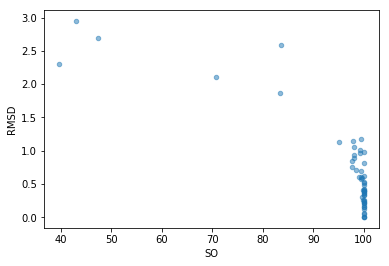

In [197]:
df_res.plot(x='SO',y='RMSD', kind='scatter',alpha=0.5)

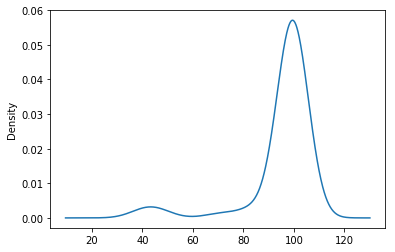

In [198]:
df_res.SO.plot.kde()

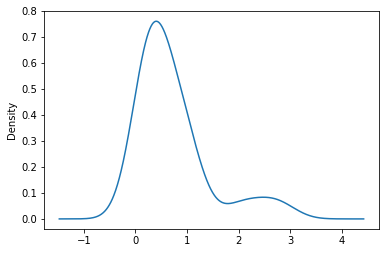

In [199]:
df_res.RMSD.plot.kde()

# CHECK SI ESTAN CONTINUOS LOS PDBS

In [1]:
file = open('2PRX_A_2PRX_B/2PRX_A.pdb').readlines()
for i in range(len(file)):
    temp = int(file[i - 1][23:27])
    actual = int(file[i][23:27])
    if (actual-temp)>2:
        print(file[i])

ATOM     33  N   SER A  15     -30.962  13.996  13.623  1.00  9.42           N  

ATOM     71  N   LEU A  30     -30.369   2.447  12.507  1.00 34.68           N  

ATOM    445  N   PRO A  92     -21.514  15.105  20.377  1.00 16.74           N  

ATOM    682  N   ARG A 125     -11.571  15.730  17.684  1.00 10.83           N  

ATOM    758  N   LEU A 139     -17.640 -13.464   9.319  1.00  6.57           N  



In [163]:
file = open('1CJL_A_1CS8_A/1CJL_A.pdb').readlines()
for i in range(len(file)):
    temp = int(file[i - 1][23:27])
    actual = int(file[i][23:27])

    if (actual-temp)>2:
        print(file[i])

ATOM   2591  N   ASN A 180      14.301  -7.297  13.059  1.00 29.91           N  



In [168]:
file = open('1F45_B_3HMX_B/1F45_B.pdb').readlines()
for i in range(len(file)):
    temp = int(file[i - 1][23:27])
    actual = int(file[i][23:27])

    if (actual-temp)>2:
        print(file[i])

ATOM   2417  N   SER B  58      55.634   6.810   0.992  1.00 46.14           N  

ATOM   2542  N   THR B  79      60.132   2.921  11.219  1.00 76.25           N  

ATOM   2597  N   SER B  95      71.749   4.765   6.060  1.00 45.42           N  

ATOM   3036  N   TYR B 167      39.458  23.334 -21.614  1.00 88.07           N  



In [167]:
file = open('2C2N_A_2C2N_B/2C2N_B.pdb').readlines()
for i in range(len(file)):
    temp = int(file[i - 1][23:27])
    actual = int(file[i][23:27])
    if (actual-temp)>2:
        print(file[i])

ATOM   4574  N   PHE B 306       5.991  -3.023  72.795  1.00 17.24           N  



In [169]:
file = open('2PZ1_A_2DX1_A/2PZ1_A.pdb').readlines()
for i in range(len(file)):
    temp = int(file[i - 1][23:27])
    actual = int(file[i][23:27])
    if (actual-temp)>2:
        print(file[i])

ATOM    585  N   GLN A 278      32.563  -2.238  44.098  1.00 63.45           N  



In [170]:
file = open('3CI6_A_3CI6_B/3CI6_A.pdb').readlines()
for i in range(len(file)):
    temp = int(file[i - 1][23:27])
    actual = int(file[i][23:27])
    if (actual-temp)>2:
        print(file[i])

ATOM    873  N   ILE A 110      17.990  35.095  21.326  1.00 21.75           N  



In [176]:
file = open('3I2W_A_3I2W_B/3I2W_A.pdb').readlines()
for i in range(len(file)):
    temp = int(file[i - 1][23:27])
    actual = int(file[i][23:27])
    if (actual-temp)>2:
        print(file[i])

ATOM   1279  N   HIS A 189     -27.976  55.186 -35.255  1.00174.41           N  



In [177]:
file = open('3J8B_H_3J8C_H/3J8B_H.pdb').readlines()
for i in range(len(file)):
    temp = int(file[i - 1][23:27])
    actual = int(file[i][23:27])
    if (actual-temp)>2:
        print(file[i])

ATOM   8875  N   PHE H 194     299.734 267.712 167.560  1.00 20.00           N  

ATOM   9155  N   UNK H1035     289.841 238.980 141.555  1.00 20.00           N  

ATOM   9220  N   UNK H1071     266.488 237.313 134.447  1.00 20.00           N  



In [182]:
file = open('4X1V_A_3U23_A/3U23_A.pdb').readlines()
for i in range(len(file)):
    temp = int(file[i - 1][23:27])
    actual = int(file[i][23:27])
    if (actual-temp)>2:
        print(file[i])

# Pendiente concatenar respuestas y armar dataset de click_mani

In [200]:
df = pd.DataFrame()
for i in lista_dir:
    try:
        file = glob.glob(i+'/*_mani.csv')[0]
        df_temp = pd.read_csv(file)
        df = pd.concat([df, df_temp], axis=0)
        print(file)
    except IndexError:
        print('====no tiene resultados======')
        print(i)
        continue

/home/serch/pdbmani/Serch/Experimentos/4S2S_H_4S2S_A/4S2S_H_4S2S_A_mani.csv
/home/serch/pdbmani/Serch/Experimentos/4PUC_A_4PUC_B/4PUC_A_4PUC_B_mani.csv
/home/serch/pdbmani/Serch/Experimentos/1WUF_A_1WUF_B/1WUF_A_1WUF_B_mani.csv
====no tiene resultados======
/home/serch/pdbmani/Serch/Experimentos/2LQR_A_2DM2_A
/home/serch/pdbmani/Serch/Experimentos/4ETV_A_4ETV_B/4ETV_A_4ETV_B_mani.csv
/home/serch/pdbmani/Serch/Experimentos/5HH0_A_5HH1_A/5HH0_A_5HH1_A_mani.csv
/home/serch/pdbmani/Serch/Experimentos/1F45_B_3HMX_B/1F45_B_3HMX_B_mani.csv
/home/serch/pdbmani/Serch/Experimentos/1EDZ_A_1EE9_A/1EDZ_A_1EE9_A_mani.csv
====no tiene resultados======
/home/serch/pdbmani/Serch/Experimentos/4ARD_A_4ARD_B
/home/serch/pdbmani/Serch/Experimentos/3M8J_A_3M8J_B/3M8J_A_3M8J_B_mani.csv
/home/serch/pdbmani/Serch/Experimentos/5IR0_A_5IR0_B/5IR0_A_5IR0_B_mani.csv
/home/serch/pdbmani/Serch/Experimentos/2PZ1_A_2DX1_A/2PZ1_A_2DX1_A_mani.csv
/home/serch/pdbmani/Serch/Experimentos/2BYC_A_2BYC_B/2BYC_A_2BYC_B_mani.cs

In [201]:
df.drop('Unnamed: 0',1,inplace=True)

df.reset_index(drop=True,inplace=True)

In [202]:
df

,proteinaA_proteinaB,grupo,cliques_ganadores,num_parejas,num_residuos_total,SO,RMSD,parejas
0,4S2S_H_4S2S_A,model_s,"[[16, 82, 66, 81, 65, 83, 84], [16, 82, 66, 81...",219,219,1.0000,0.3454,"[(1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6..."
1,4PUC_A_4PUC_B,model_s,"[[180, 185, 193, 184, 181, 182, 183], [184, 18...",478,479,0.9979,0.2783,"[(43, 43), (44, 44), (45, 45), (46, 46), (47, ..."
2,1WUF_A_1WUF_B,model_s,"[[222, 256, 255, 224, 225, 226, 227], [222, 25...",371,371,1.0000,0.0219,"[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5..."
3,4ETV_A_4ETV_B,model_s,"[[72, 113, 114, 112, 115, 116, 117], [120, 166...",129,130,0.9923,0.6649,"[(700, 700), (701, 701), (702, 702), (703, 703..."
4,5HH0_A_5HH1_A,model_s,"[[114, 112, 113, 108, 109, 110, 111], [114, 11...",195,195,1.0000,0.3390,"[(5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, ..."
5,1F45_B_3HMX_B,model_s,"[[59, 58, 57, 55, 56, 60, 24], [87, 86, 85, 83...",49,133,0.6032,2.2904,"[(20, 174), (21, 33), (22, 30), (25, 29), (28,..."
6,1EDZ_A_1EE9_A,model_s,"[[47, 50, 48, 49, 51, 45, 46], [58, 61, 59, 60...",317,317,1.0000,0.5878,"[(3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8..."
7,3M8J_A_3M8J_B,model_s,"[[76, 74, 75, 72, 73, 70, 71], [76, 74, 75, 72...",88,88,1.0000,1.2705,"[(10, 10), (11, 11), (12, 12), (13, 13), (14, ..."
8,5IR0_A_5IR0_B,model_s,"[[26, 29, 27, 28, 30, 32, 31], [23, 26, 24, 25...",65,100,0.6600,2.1179,"[(5, 4), (7, 6), (8, 7), (9, 8), (10, 9), (14,..."
9,2PZ1_A_2DX1_A,model_s,"[[94, 91, 92, 89, 90, 93, 95], [232, 229, 230,...",134,377,0.5703,2.3975,"[(124, 186), (125, 188), (126, 187), (129, 199..."


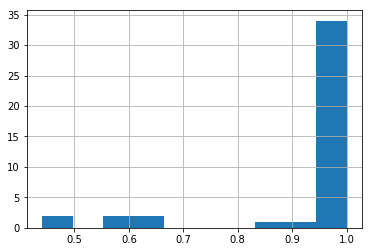

In [189]:
df.SO.hist()

# Analisis de resultados


In [264]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
plt.style.use('ggplot')
font = {'family' : 'sans','weight' : 'bold','size'   : 20}
plt.rc('font', **font)
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['figure.figsize'] = (16,8)


Transformaciones de la info para cruzar en un solo dataset

In [212]:
df['SO'] = df.SO * 100

In [240]:
df_res['proteinaA_proteinaB'] = df_res.proteinaA_proteinaB.str.replace('-','_')

In [243]:
df_res.head()

,proteinaA_proteinaB,grupo,cliques_ganadores,num_parejas,num_residuos_total,SO,RMSD,parejas
0,4S2S_H_4S2S_A,click,[],219,219,100.00,0.41,[]
1,4PUC_A_4PUC_B,click,[],478,483,99.79,0.26,[]
2,1WUF_A_1WUF_B,click,[],371,371,100.00,0.05,[]
3,2LQR_A_2DM2_A,click,[],930,2200,43.06,2.95,[]
4,4ETV_A_4ETV_B,click,[],129,130,99.23,0.97,[]


In [241]:
df.head()

,proteinaA_proteinaB,grupo,cliques_ganadores,num_parejas,num_residuos_total,SO,RMSD,parejas
0,4S2S_H_4S2S_A,model_s,"[[16, 82, 66, 81, 65, 83, 84], [16, 82, 66, 81...",219,219,100.00,0.3454,"[(1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6..."
1,4PUC_A_4PUC_B,model_s,"[[180, 185, 193, 184, 181, 182, 183], [184, 18...",478,479,99.79,0.2783,"[(43, 43), (44, 44), (45, 45), (46, 46), (47, ..."
2,1WUF_A_1WUF_B,model_s,"[[222, 256, 255, 224, 225, 226, 227], [222, 25...",371,371,100.00,0.0219,"[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5..."
3,4ETV_A_4ETV_B,model_s,"[[72, 113, 114, 112, 115, 116, 117], [120, 166...",129,130,99.23,0.6649,"[(700, 700), (701, 701), (702, 702), (703, 703..."
4,5HH0_A_5HH1_A,model_s,"[[114, 112, 113, 108, 109, 110, 111], [114, 11...",195,195,100.00,0.3390,"[(5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, ..."


In [245]:
# DATAFRAME RESULTADOS
df_result = df.merge(df_res,on='proteinaA_proteinaB',suffixes=["_mani","_click"])

In [338]:
df_result

,proteinaA_proteinaB,grupo_mani,cliques_ganadores_mani,num_parejas_mani,num_residuos_total_mani,SO_mani,RMSD_mani,parejas_mani,grupo_click,cliques_ganadores_click,num_parejas_click,num_residuos_total_click,SO_click,RMSD_click,parejas_click
0,4S2S_H_4S2S_A,model_s,"[[16, 82, 66, 81, 65, 83, 84], [16, 82, 66, 81...",219,219,100.00,0.3454,"[(1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6...",click,[],219,219,100.00,0.41,[]
1,4PUC_A_4PUC_B,model_s,"[[180, 185, 193, 184, 181, 182, 183], [184, 18...",478,479,99.79,0.2783,"[(43, 43), (44, 44), (45, 45), (46, 46), (47, ...",click,[],478,483,99.79,0.26,[]
2,1WUF_A_1WUF_B,model_s,"[[222, 256, 255, 224, 225, 226, 227], [222, 25...",371,371,100.00,0.0219,"[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5...",click,[],371,371,100.00,0.05,[]
3,4ETV_A_4ETV_B,model_s,"[[72, 113, 114, 112, 115, 116, 117], [120, 166...",129,130,99.23,0.6649,"[(700, 700), (701, 701), (702, 702), (703, 703...",click,[],129,130,99.23,0.97,[]
4,1EDZ_A_1EE9_A,model_s,"[[47, 50, 48, 49, 51, 45, 46], [58, 61, 59, 60...",317,317,100.00,0.5878,"[(3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8...",click,[],317,317,100.00,0.33,[]
5,3M8J_A_3M8J_B,model_s,"[[76, 74, 75, 72, 73, 70, 71], [76, 74, 75, 72...",88,88,100.00,1.2705,"[(10, 10), (11, 11), (12, 12), (13, 13), (14, ...",click,[],88,88,100.00,0.62,[]
6,5IR0_A_5IR0_B,model_s,"[[26, 29, 27, 28, 30, 32, 31], [23, 26, 24, 25...",65,100,66.00,2.1179,"[(5, 4), (7, 6), (8, 7), (9, 8), (10, 9), (14,...",click,[],99,101,99.00,0.60,[]
7,2BYC_A_2BYC_B,model_s,"[[58, 59, 60, 4, 5, 56, 57], [58, 59, 60, 4, 5...",109,132,100.00,1.9179,"[(500, 2), (504, 4), (505, 5), (506, 6), (507,...",click,[],132,132,100.00,0.36,[]
8,2IJ9_A_2IJ9_B,model_s,"[[45, 47, 46, 48, 44, 65, 43], [49, 51, 50, 52...",209,214,97.66,0.7734,"[(1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6...",click,[],210,216,98.13,0.94,[]
9,1BW0_A_1BW0_B,model_s,"[[79, 77, 80, 100, 74, 75, 76], [53, 55, 52, 2...",411,411,100.00,0.5334,"[(4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9...",click,[],411,412,100.00,0.26,[]


(40, 103)

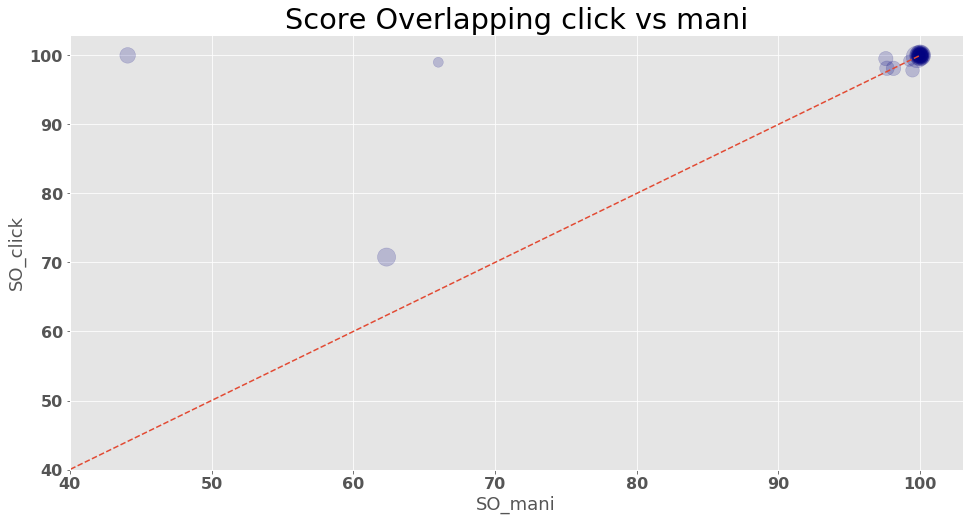

In [339]:
marker_size = df_result.num_residuos_total_mani
df_result.plot(kind='scatter',x='SO_mani',y='SO_click', alpha=0.2, 
               title='Score Overlapping click vs mani',s=marker_size,
              color='navy')
plt.plot([0,100],[0,100],'--')
plt.xlim(40,103)
plt.ylim(40,103)

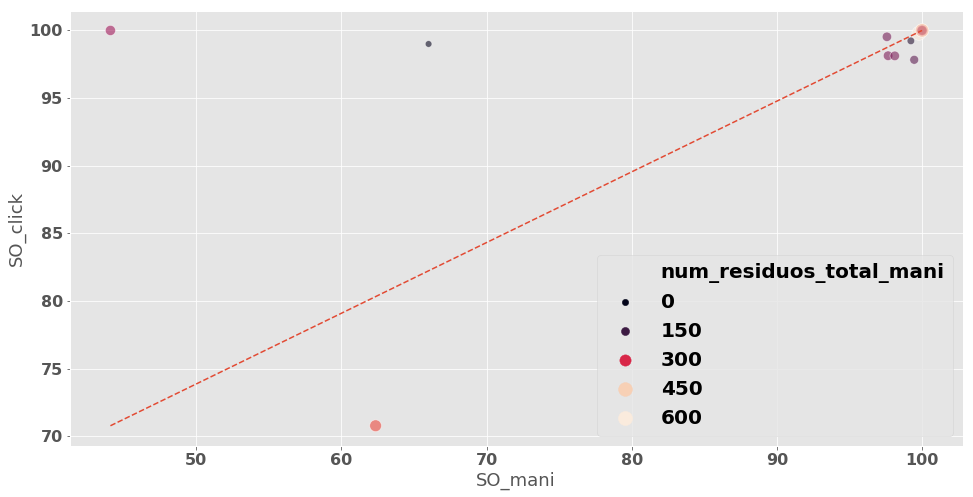

In [337]:
marker_size = df_result.num_residuos_total_mani
ax = sns.scatterplot(x="SO_mani", y="SO_click", size=marker_size,
                     hue=marker_size, sizes=(40, 200), alpha=0.6,
                     data=df_result,palette="rocket", legend="brief")

leg = ax.axes.get_legend()
# leg.set_title("Número de residuos totales")
leg.set_label("Número de residuos totales")

plt.plot([df_result.SO_mani.min(),df_result.SO_mani.max()],
         [df_result.SO_click.min(),df_result.SO_click.max()]
         ,'--')

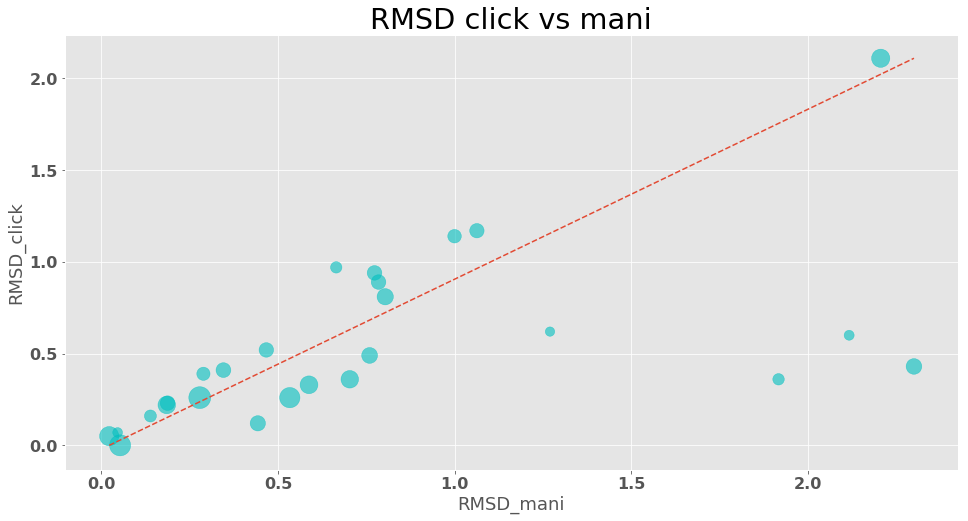

In [286]:
marker_size = df_result.num_residuos_total_mani
df_result.plot(kind='scatter',x='RMSD_mani',y='RMSD_click', alpha=0.6, 
               title='RMSD click vs mani',s=marker_size,
              color='c')
plt.plot([df_result.RMSD_mani.min(),df_result.RMSD_mani.max()],
         [df_result.RMSD_click.min(),df_result.RMSD_click.max()],
         '--')
